# DATA 1 Practical 6 - Model Answers
                                                                                                    Simos Gerasimou


## From Inferences to Predictions and Back. Where Should We Stop?

**Pandas API Reference**: https://pandas.pydata.org/pandas-docs/stable/reference/index.html

**Matplotlib API Reference**: https://matplotlib.org/3.1.1/api/index.html

**Seaborn API Reference**: https://seaborn.pydata.org/api.html

**Scipy Stats API Reference**: https://docs.scipy.org/doc/scipy/reference/stats.html

**t table Reference**:  http://www.ttable.org

**F table Reference**  https://www.stat.purdue.edu/~jtroisi/STAT350Spring2015/tables/FTable.pdf

**Chi-Square table Reference** https://people.smp.uq.edu.au/YoniNazarathy/stat_models_B_course_spring_07/distributions/chisqtab.pdf


In [3]:
#Preamble: Add main Python libraries
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

***

## Inferential Statistics Primer

#### To get started with today's practical, you can go to Lectures 11 and 12 and try to replicate the inferential statistics we saw during the lectures, i.e., independent and paired t test, ANOVA and Chi-Square. This will enable you to understand better how these tests operate under the hood. 

***

### Part A: Yorkshire City Council

DataVision has been commissioned by the York City Council to analyse a set of data regarding citizens of Yorkshire and extract actionable knowledge. 

The dataset for Yorkhire citizens is available on the following link:
* [Yorkshire dataset](https://drive.google.com/file/d/12UiWQOx8qOiAOBrKirnlU6TG6lv2lfHu/view?usp=sharing)


**TA1) Load the Yorkshire dataset using Pandas**

**Note**: You have to download the dataset on your local machine and then load it onto the Jupyter Notebook

In [4]:
#Answer
df = pd.read_csv("yorkshire.csv")
# df.drop(["Unnamed: 0"], axis=1, inplace=True)
# df.to_csv("yorkshire.csv", index=False)

**TA2) Print the first 15 records of the dataframe**

In [5]:
#Answer
df.head(15)

,id,age,gender,region,income,married,children,car,mortgage
0,ID12101,48,FEMALE,INNER_CITY,17546.000000,NO,1,NO,NO
1,ID12102,40,MALE,TOWN,30085.100000,YES,3,YES,YES
2,ID12103,51,FEMALE,INNER_CITY,16575.400000,YES,0,YES,NO
3,ID12104,23,FEMALE,TOWN,20375.400000,YES,3,NO,NO
4,ID12105,57,FEMALE,RURAL,15944.690366,YES,0,NO,NO
5,ID12106,57,FEMALE,TOWN,37869.600000,YES,2,NO,NO
6,ID12107,22,MALE,RURAL,8877.070000,NO,0,NO,NO
7,ID12108,58,MALE,TOWN,24946.600000,YES,0,YES,NO
8,ID12109,37,FEMALE,SUBURBAN,25304.300000,YES,2,YES,NO
9,ID12110,54,MALE,TOWN,24212.100000,YES,2,YES,NO


**TA3) Get general info about the dataset**

In [6]:
#Answer
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        330 non-null    object 
 1   age       330 non-null    int64  
 2   gender    330 non-null    object 
 3   region    330 non-null    object 
 4   income    330 non-null    float64
 5   married   330 non-null    object 
 6   children  330 non-null    int64  
 7   car       330 non-null    object 
 8   mortgage  330 non-null    object 
dtypes: float64(1), int64(2), object(6)
memory usage: 15.5+ KB


**TA4) Explore the dataset and try to understand the meaning of each variable (column). Identify which variables are categorical and which are numerical.**

In [7]:
#Answer
#id:        citizen ID
#age:       citizen age
#gender:    citizen gender (male/female)
#region:    inner city/suburban/town/rural
#income:    amount of income per year
#married:   yes/no (single)
#children:  number of children
#car:       yes/no (does the citizen have a car)
#mortgage:  yes/no (does the citizen have a mortgage)

**TA5) Get the shape of the dataframe**

In [8]:
#Answer
df.shape

(330, 9)

**TA6) Get the columns name of the dataframe. If you think any column renaming is needed, please do it.**

In [9]:
#Answer
df.columns

Index(['id', 'age', 'gender', 'region', 'income', 'married', 'children', 'car',
       'mortgage'],
      dtype='object')

**TA7) Check whether there are any duplicated records?**  

Note: A record is duplicated if all its entries are identical with another record

In [10]:
#Answer
df.duplicated().sum()

0

**TA8) Is there any missing data?**

In [11]:
#Answer
# Get the missing data and sort it in ascending order
missingDataSummary    = df.isna().sum().sort_values(ascending=False)
# Calculate the percentage of missing data
missingDataPercentage = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
# Concatenate the two Series
missingData = pd.concat([missingDataSummary, missingDataPercentage], axis=1, keys=['Missing', 'Percentage'])
missingData

,Missing,Percentage
mortgage,0,0.0
car,0,0.0
children,0,0.0
married,0,0.0
income,0,0.0
region,0,0.0
gender,0,0.0
age,0,0.0
id,0,0.0


**TA9) Plot the histogram and density curve of income.**

c:\projects\scaleystuffs\venv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


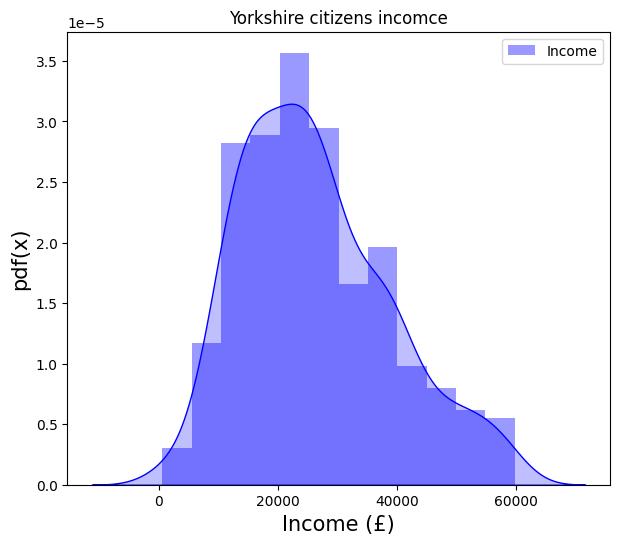

In [12]:
#Answer
plt.subplots(figsize=(7,6), dpi=100)
ax = sns.distplot(df["income"], color="blue", label="Income", hist=True, kde_kws={"shade": True})
plt.title('Yorkshire citizens incomce')
ax.set_xlabel('Income (£)',fontsize=15) # set x label
ax.set_ylabel('pdf(x)',fontsize=15,rotation=90) # set y label
plt.legend();

**TA10) The Council is interested in assessing whether there is any discrimination in annual income between genders**

**(i) State the Null and Alternative hypotheses**

In [13]:
#Answer
# x_m: annual income of male citizens
# x_f: annual income of female citizens
#H0: x_m = x_f
#H1: x_m != x_f

**(ii) Calculate the degrees of freedom**

In [14]:
#Answer
dfM = df[df['gender']=="MALE"]
dfF = df[df['gender']=="FEMALE"]
dof = len(dfM) + len(dfF) - 2
print ("DoF:", dof)

DoF: 328


**(iii) Find the critical value for a two-tailed test with significance level α=0.05**

Hint: t table [http://www.ttable.org](http://www.ttable.org)

Hint: Confirm that the value is correct using the appropriate statistical test method from [scipy.stats.t](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html)


In [15]:
#Answer
alpha = 0.05
negativeCriticalValue = stats.t.ppf(alpha/2, dof)
positiveCriticalValue = stats.t.ppf(1-alpha/2, dof)
print("Negative side critical value:", negativeCriticalValue)
print("Positive side critical value:", positiveCriticalValue)

Negative side critical value: -1.9672228266462515
Positive side critical value: 1.967222826646251


**(iv) Perform the appropriate t test to evaluate the hypotheses for significance level  𝛼=0.05 . You must show your calculations, i.e., calculate the result analytically, but you may use the appropriate scipy.stats method to check your results.**

In [16]:
#Answer
incomeM = np.mean(dfM["income"])
incomeF = np.mean(dfF["income"])
stdIncM = np.std(dfM["income"],ddof=1)
stdIncF = np.std(dfF["income"], ddof=1)

sp  =( ((len(dfM["income"])-1) * np.power(stdIncM,2)) + ((len(dfF["income"])-1) * np.power(stdIncF,2)) ) / (len(dfM["income"]) + len(dfF["income"]) - 2)
# print("SP:", sp)

tStat = (incomeM - incomeF) / np.sqrt( (sp/len(dfM["income"])) + (sp/len(dfF["income"])) )
print("t stat:", tStat)

tStat2, pValue = stats.ttest_ind(dfM["income"], dfF["income"])
print ("t stat2:", tStat2)
print ("pValue (two-tailed; reported by scipy.ttest_ind):" , pValue)

#Checking H0: #We cannot reject H0, no evidence of discrimination
print ("We cannot reject H0 because: \
abs(t stat)<t critical, i.e., abs({:.3f})<({:.3f})".format(tStat, positiveCriticalValue))

t stat: 0.3527875829434242
t stat2: 0.3527875829434242
pValue (two-tailed; reported by scipy.ttest_ind): 0.7244742902363241
We cannot reject H0 because: abs(t stat)<t critical, i.e., abs(0.353)<(1.967)


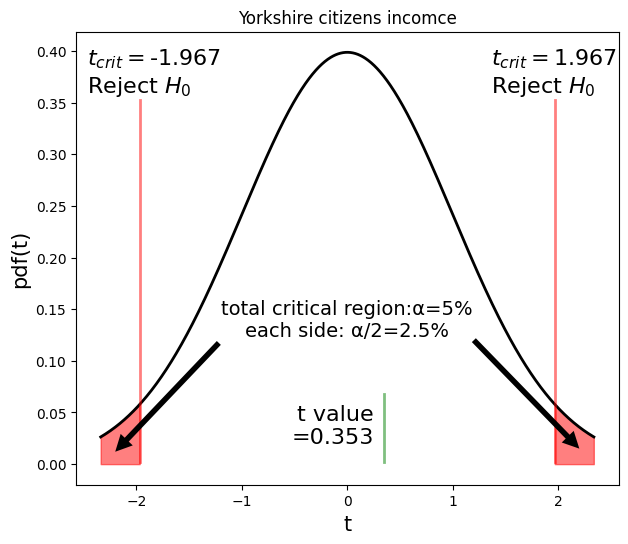

In [17]:
#Additional Visualisation
xAxis = np.linspace(stats.t.ppf(0.01, dof), stats.t.ppf(0.99, dof), 1000)
yAxis = stats.t.pdf(xAxis, dof)

fig,ax = plt.subplots(figsize=(7,6), dpi=100)
ax = sns.lineplot(y=yAxis, x=xAxis, linestyle='-', color="black", label="A", lw=2)
plt.title('Yorkshire citizens incomce')
ax.set_xlabel('t',fontsize=15) # set x label
ax.set_ylabel('pdf(t)',fontsize=15, rotation=90) # set y label

#t value
ax.axvline(x=tStat, ymin=0.05, ymax=0.2, color='g',alpha=0.5, ls='-', lw=2) # vertical line
ax.text(tStat-0.1, 0.02,"t value\n={:.3f}".format(tStat), fontsize=16, ha="right")

#negative-side critical region
ax.axvline(x=negativeCriticalValue, ymin=0.05, ymax=0.85, color='r',alpha=0.5, ls='-', lw=2)
ax.text(negativeCriticalValue-0.5, 0.36,r"$t_{crit}=$"+"{:.3f}\nReject $H_0$".format(negativeCriticalValue), fontsize=16)
px = np.arange(np.min(xAxis), negativeCriticalValue, 0.01)
ax.fill_between(px, stats.t.pdf(px, dof), alpha=0.5, color='r')

#positive-side critical region
ax.axvline(x=positiveCriticalValue, ymin=0.05, ymax=0.85, color='r',alpha=0.5, ls='-', lw=2)
ax.text(positiveCriticalValue-0.6, 0.36,r"$t_{crit}=$"+"{:.3f}\nReject $H_0$".format(positiveCriticalValue), fontsize=16, ha="left")
px = np.arange(positiveCriticalValue, np.max(xAxis), 0.01)
ax.fill_between(px, stats.t.pdf(px, dof), alpha=0.5, color='r')

#negative side arrow
ax.annotate("total critical region:α=5%\neach side: α/2=2.5%".format(3), xy=(-2.2, 0.012), xytext=(0, 0.12), size=14,  va="bottom", ha="center",
            arrowprops=dict(facecolor='black', lw=3.5, ls='--', ec='None'))

#positive side arrow
ax.annotate("", xy=(2.2, 0.015), xytext=(1.2, 0.12), size=14,  va="bottom", ha="center",
            arrowprops=dict(facecolor='black', lw=3.5, ls='--', ec='None'))


# ax.legend(loc="lower center")
ax.legend().remove()

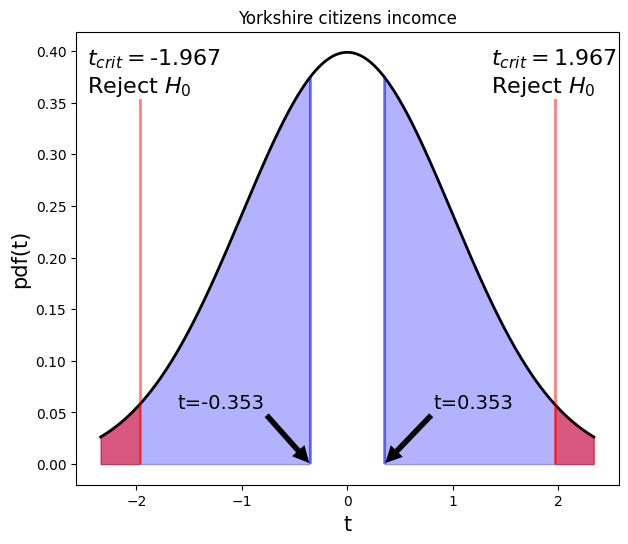

In [18]:
#Additional visualisation
xAxis = np.linspace(stats.t.ppf(0.01, dof), stats.t.ppf(0.99, dof), 1000)
yAxis = stats.t.pdf(xAxis, dof)

fig,ax = plt.subplots(figsize=(7,6), dpi=100)
ax = sns.lineplot(y=yAxis, x=xAxis, linestyle='-', color="black", label="A", lw=2)
plt.title('Yorkshire citizens incomce')
ax.set_xlabel('t',fontsize=15) # set x label
ax.set_ylabel('pdf(t)',fontsize=15, rotation=90) # set y label

#negative-side p value
ax.axvline(x=-tStat, ymin=0.05, ymax=0.9, color='b',alpha=0.5, ls='-', lw=2)
# ax.text(-tStat-0.5, 0.36,r"$t_{crit}=$"+"{:.3f}\nReject $H_0$".format(-tStat), fontsize=16)
px = np.arange(np.min(xAxis), -tStat, 0.01)
ax.fill_between(px, stats.t.pdf(px, dof), alpha=0.3, color='b')

#positive-side p value
ax.axvline(x=tStat, ymin=0.05, ymax=0.9, color='b',alpha=0.5, ls='-', lw=2)
# ax.text(tStat-0.6, 0.36,r"$t_{crit}=$"+"{:.3f}\nReject $H_0$".format(tStat), fontsize=16, ha="left")
px = np.arange(tStat, np.max(xAxis), 0.01)
ax.fill_between(px, stats.t.pdf(px, dof), alpha=0.3, color='b')

#negative-side critical region
ax.axvline(x=negativeCriticalValue, ymin=0.05, ymax=0.85, color='r',alpha=0.5, ls='-', lw=2)
ax.text(negativeCriticalValue-0.5, 0.36,r"$t_{crit}=$"+"{:.3f}\nReject $H_0$".format(negativeCriticalValue), fontsize=16)
px = np.arange(np.min(xAxis), negativeCriticalValue, 0.01)
ax.fill_between(px, stats.t.pdf(px, dof), alpha=0.5, color='r')

#positive-side critical region
ax.axvline(x=positiveCriticalValue, ymin=0.05, ymax=0.85, color='r',alpha=0.5, ls='-', lw=2)
ax.text(positiveCriticalValue-0.6, 0.36,r"$t_{crit}=$"+"{:.3f}\nReject $H_0$".format(positiveCriticalValue), fontsize=16, ha="left")
px = np.arange(positiveCriticalValue, np.max(xAxis), 0.01)
ax.fill_between(px, stats.t.pdf(px, dof), alpha=0.5, color='r')

#negative side arrow
ax.annotate("t=-0.353", xy=(-0.36, 0.001), xytext=(-1.2, 0.05), size=14,  va="bottom", ha="center",
            arrowprops=dict(facecolor='black', lw=3.5, ls='--', ec='None'))

#positive side arrow
ax.annotate("t=0.353", xy=(0.36, 0.001), xytext=(1.2, 0.05), size=14,  va="bottom", ha="center",
            arrowprops=dict(facecolor='black', lw=3.5, ls='--', ec='None'))


# ax.legend(loc="lower center")
ax.legend().remove()

**TA11) The Council is interested in assessing whether there is any discrimination in annual income between married and single citizens, and specifically whether married citizens are being paid more**

**(i) State the Null and Alternative hypotheses**

In [19]:
#Answer
#H0: x_m <= x_s
#H1: x_m > x_s

**(ii) Calculate the degrees of freedom**

In [20]:
#Answer
dfMar = df[df['married']=="YES"]
dfSin = df[df['married']=="NO"]
dof = len(dfMar) + len(dfSin) - 2
print ("DoF:", dof)
print("Married:", len(dfMar))
print("Single:", len(dfSin))

DoF: 328
Married: 214
Single: 116


**(iii) Find the critical value for a test with significance level α=0.05**

Hint: t table http://www.ttable.org

Hint: Confirm that the value is correct using the appropriate statistical test method from scipy.stats.t

In [21]:
#Answer
stats.t.ppf(0.95, dof)

1.6495124933663257

**(iv) Perform the appropriate t test to evaluate the hypotheses for significance level 𝛼=0.05 . You must show your calculations, i.e., calculate the result analytically, but you may use the appropriate scipy.stats method to check your results.**

In [22]:
#Answer
incomeMar = np.mean(dfMar["income"])
incomeSin = np.mean(dfSin["income"])
stdIncMar = np.std(dfMar["income"],ddof=1)
stdIncSin = np.std(dfSin["income"], ddof=1)

sp  =( ((len(dfMar["income"])-1) * np.power(stdIncMar,2)) + ((len(dfSin["income"])-1) * np.power(stdIncSin,2)) ) / (len(dfMar["income"]) + len(dfSin["income"]) - 2)
print("SP:", sp)
t = (incomeMar - incomeSin) / np.sqrt( (sp/len(dfMar["income"])) + (sp/len(dfSin["income"])) )
print("t stat:", t)

stats.ttest_ind(dfMar["income"], dfSin["income"])
#We cannot reject H0, no evidence of discrimination

SP: 158561804.21151838
t stat: 0.25591405256592475


Ttest_indResult(statistic=0.2559140525659247, pvalue=0.7981776220871312)

**(v) Plot the two distributions of income for married and single citizens**

c:\projects\scaleystuffs\venv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\projects\scaleystuffs\venv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


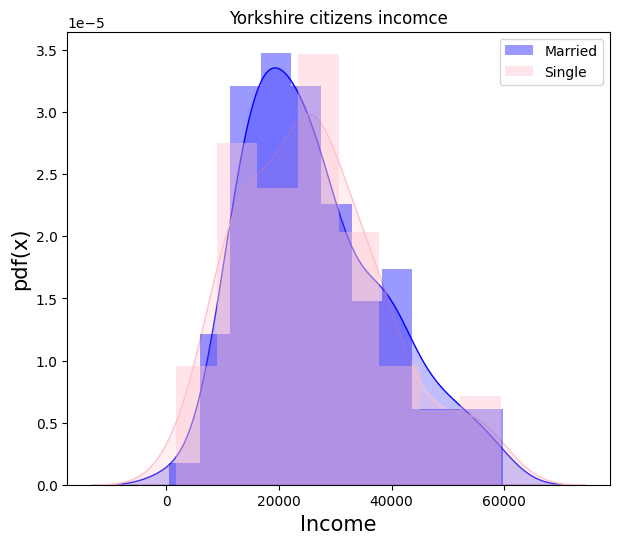

In [23]:
#Answer
plt.subplots(figsize=(7,6), dpi=100)
ax = sns.distplot(dfMar["income"], color="blue", label="Married", hist=True, kde_kws={"shade": True})
ax = sns.distplot(dfSin["income"], color="pink", label="Single", hist=True, kde_kws={"shade": True})
plt.title('Yorkshire citizens incomce')
ax.set_xlabel('Income',fontsize=15) # set x label
ax.set_ylabel('pdf(x)',fontsize=15,rotation=90) # set y label
plt.legend();

**TA12) The Council is also interested in assessing whether there is any statistically significant difference in income depending on the region citizens live. They want to give equal opportunities to all Yorkies irrespective of where they live.**

**(i) State the Null and Alternative hypotheses that will enable the Council to check whether there is any discrimination in income depending on location**

#### Write your answer here

$H_0: \overline{X}_{inner} = \overline{X}_{town} = \overline{X}_{sub} = \overline{X}_{rural}$

$H_1: \exists i,j \in \{inner, town, sub, rural\} \bullet (i \neq j) \land (\overline{X}_{i} \neq \overline{X}_{j})$


**(ii) Calculate the degrees of freedom**

In [24]:
#Answer
df_M = 3     #4-1 
df_R = 326   #330-4 

**(iii) Find the critical value for a test with significance level α=0.05**

Hint: What type of test do we need to do in this scenario?


In [25]:
#Answer
stats.f.ppf(0.05, df_M, df_R)

0.11716586535347082

**(iv) Perform the appropriate test to evaluate the hypotheses for significance level 𝛼=0.05 . You must show your calculations, i.e., calculate the result analytically, but you may use the appropriate scipy.stats method to check your results.**

In [26]:
#Answer
#Analytically
dfInner  = df[df["region"]=="INNER_CITY"]["income"]
dfTown   = df[df["region"]=="TOWN"]["income"]
dfRURAL  = df[df["region"]=="RURAL"]["income"]
dfSub    = df[df["region"]=="SUBURBAN"]["income"]

X_N = np.mean(np.mean(df["income"]))
X_G = [np.mean(dfInner), np.mean(dfTown), np.mean(dfRURAL), np.mean(dfSub)]

SS_M = 0; SS_R = 0; SS_T=0

SS_M += len(dfInner) * np.power(np.mean(dfInner) - X_N,2)
SS_M += len(dfTown) * np.power(np.mean(dfTown) - X_N,2)
SS_M += len(dfRURAL) * np.power(np.mean(dfRURAL) - X_N,2)
SS_M += len(dfSub) * np.power(np.mean(dfSub) - X_N,2)

SS_R += (len(dfInner)-1) * np.var(dfInner, ddof=1)
SS_R += (len(dfTown)-1) * np.var(dfTown, ddof=1)
SS_R += (len(dfRURAL)-1) * np.var(dfRURAL, ddof=1)
SS_R += (len(dfSub)-1) * np.var(dfSub, ddof=1)
    
SS_T = (len(df["income"]) -1) * np.var(df["income"], ddof=1)

# print(SS_T, SS_R, SS_M)                                          
                                          
F1 = (SS_M/(4-1))/\
    (SS_R/(np.count_nonzero(df['income'])-4))

# #Using Scipy library
F2 = stats.f_oneway(dfInner, dfTown, dfRURAL, dfSub)

print(F1,"\n", F2)
#We cannot reject H0

0.2836816383941944 
 F_onewayResult(statistic=0.28368163839419575, pvalue=0.837176416513448)


**(v) Plot a boxplot showing the income per region**

<AxesSubplot:>

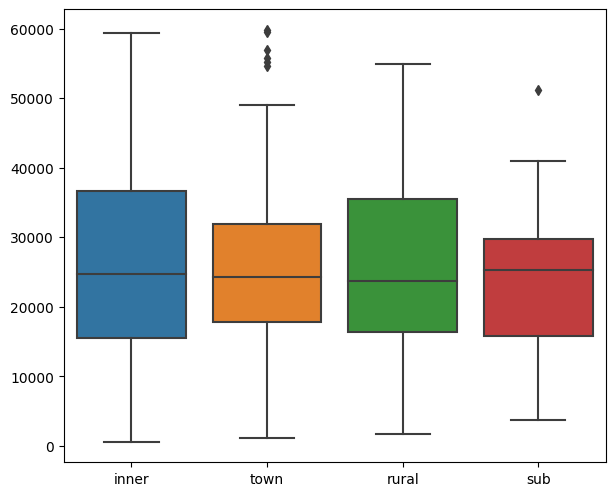

In [27]:
#Write your answer here
regions = pd.DataFrame(data={"inner":dfInner, "town":dfTown, "rural":dfRURAL, "sub":dfSub})
plt.subplots(figsize=(7,6), dpi=100)
sns.boxplot(data=regions)

**TA13) The Council is also interested in assessing whether there is any statistically significant difference in income depending on the age of citizens. The Council considers the following age groups [17-29], [30,41], [42,53], [54,67)** 

**(i) State the Null and Alternative hypotheses that will enable the Council to check whether there is any discrimination in income depending on these age groups**

#### Write your answer here

$H_0: \overline{X}_{G1} = \overline{X}_{G2} = \overline{X}_{G3} = \overline{X}_{G4}$

$H_1: \exists i,j \in \{G1, G2, G3, G4\} \bullet (i \neq j) \land (\overline{X}_{i} \neq \overline{X}_{j})$


**(ii) Calculate the degrees of freedom**

In [28]:
#Answer
df_M = 3     #4-1 
df_R = 326   #330-4 

**(iv) Perform the appropriate test to evaluate the hypotheses for significance level 𝛼=0.05. You may use the appropriate scipy.stats method.**

In [29]:
#Answer
dfG1  = df[df["age"]<30]["income"]
dfG2   = df[(df["age"]>=30) & (df["age"]<42)]["income"]
dfG3  = df[(df["age"]>=42) & (df["age"]<54)]["income"]
dfG4    = df[(df["age"]>=54)]["income"]
stats.f_oneway(dfG1, dfG2, dfG3, dfG4)
#H0 is rejected

F_onewayResult(statistic=60.50403159244408, pvalue=4.030330123627726e-31)

**(v) Plot the distributions for the four age groups**

c:\projects\scaleystuffs\venv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\projects\scaleystuffs\venv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\projects\scaleystuffs\venv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplo

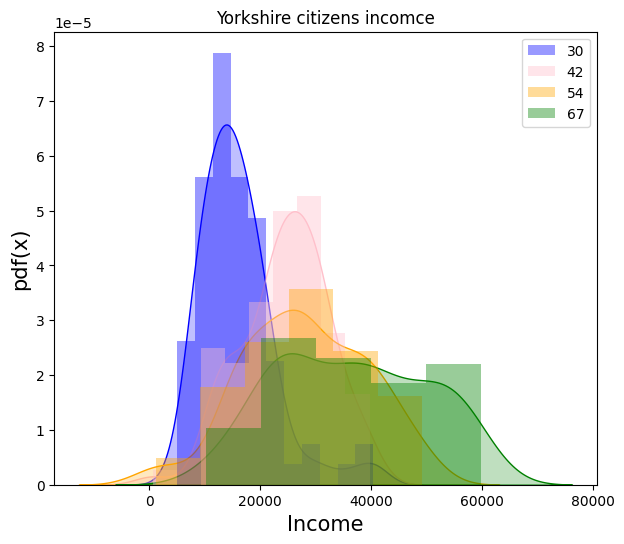

In [30]:
#Answer
plt.subplots(figsize=(7,6), dpi=100)
ax = sns.distplot(dfG1, color="blue", label="30", hist=True, kde_kws={"shade": True})
ax = sns.distplot(dfG2, color="pink", label="42", hist=True, kde_kws={"shade": True})
ax = sns.distplot(dfG3, color="orange", label="54", hist=True, kde_kws={"shade": True})
ax = sns.distplot(dfG4, color="green", label="67", hist=True, kde_kws={"shade": True})
plt.title('Yorkshire citizens incomce')
ax.set_xlabel('Income',fontsize=15) # set x label
ax.set_ylabel('pdf(x)',fontsize=15,rotation=90) # set y label
plt.legend();

**(vi) Perform a post hoc analysis using the Bonferroni correction to identify the pairs which exhibit statistically significant difference**

In [31]:
#Answer
bonf = 0.05/6
tG12 = stats.ttest_ind(dfG1, dfG2)
tG13 = stats.ttest_ind(dfG1, dfG3)
tG14 = stats.ttest_ind(dfG1, dfG4)
tG23 = stats.ttest_ind(dfG2, dfG3)
tG24 = stats.ttest_ind(dfG2, dfG4)
tG34 = stats.ttest_ind(dfG3, dfG4)

print("Adjusted p crit : {:.4f}".format(bonf/2))
print("ComptG12: {:.4f}".format(tG12[1]))
print("ComptG13: {:.4f}".format(tG13[1]))
print("ComptG14: {:.4f}".format(tG14[1]))
print("ComptG23: {:.4f}".format(tG23[1]))
print("ComptG24: {:.4f}".format(tG24[1]))
print("ComptG34: {:.4f}".format(tG34[1]))
#All have differences except groups 2 and 3 (30-41, 42-53)

Adjusted p crit : 0.0042
ComptG12: 0.0000
ComptG13: 0.0000
ComptG14: 0.0000
ComptG23: 0.0187
ComptG24: 0.0000
ComptG34: 0.0000


**(vii) Plot a boxplot showing the income per age group**

<AxesSubplot:>

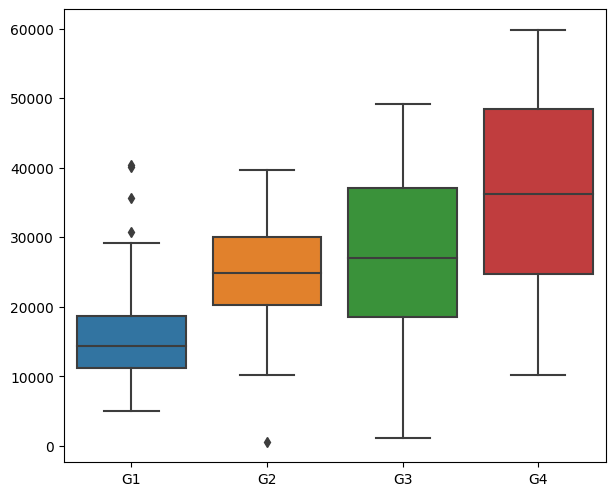

In [32]:
#Answer
ages = pd.DataFrame(data={"G1":dfG1, "G2":dfG2, "G3":dfG3, "G4":dfG4})
plt.subplots(figsize=(7,6), dpi=100)
sns.boxplot(data=ages)

**TA14) Implement the Pearson colleration metric to investigate whether there is any correlation between 'Age' (no groups) and 'Income'. Once you finish the implementation you can check their correctness using the built-in functions of Scipy.stats**

What is your interpretation for the correlation between "Age" and "Income"?

* Tip: See https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.pearsonr.html


In [33]:
#Answer

#Analytically
ageDiff      = np.sum( (df["age"] - np.mean(df["age"])) * (df["income"] - np.mean(df["income"])) )
ageIncomeCov = ageDiff / (df.shape[0]-1)
ageIncomeCor = ageIncomeCov / (np.std(df["age"], ddof=1) * np.std(df["income"], ddof=1))
print("Correlation2:", ageIncomeCor)

#Using stats library
print("Correlation2:", stats.pearsonr(df["age"], df["income"]))

Correlation2: 0.6237592016595748
Correlation2: (0.6237592016595748, 5.604857947487841e-37)


**TA15) Create a new column in the dataframe called "age group" that splits the ages into groups of size 15**

Hint: Look at the Pandas method cut(data, bins, labels)

In [34]:
#Answer
df["ageGroup"]= pd.cut(df["age"], range(0, 81, 15) , right=False)

**TA16) Generate a contingency table to show how the age group (x axis) is related to the region (y axis)**

* Hint: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html

**Note**: A contingency table summarises data for two (or more) categorical variables

In [35]:
#Write your answer here
pd.crosstab(df['ageGroup'], df['region'], margins=all)

region,INNER_CITY,RURAL,SUBURBAN,TOWN,All
ageGroup,,,,,
"[15, 30)",48,13,4,18,83
"[30, 45)",44,10,7,41,102
"[45, 60)",36,20,10,24,90
"[60, 75)",27,11,4,13,55
All,155,54,25,96,330


**TA17) What would be the hypotheses if the Council wants to assess whether the age group and region variables are independent? Report these hypotheses**

In [36]:
#Answer
#H0: Age group and region are independent
#H1: Age group and region are not independent

**TA18) Implement the Chi Square to investigate whether there is any dependency between region and age group. Once you finish the implementation you can check their correctness using the built-in functions of Scipy.stats**

* Hint: You may need to use the data from TA16

* Hint: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html

In [37]:
#Answer
contingencyTable = pd.crosstab(df['ageGroup'], df['region'], margins=all)
chi_sq_Stat, p_value, deg_freedom, exp_freq =  stats.chi2_contingency(contingencyTable)
print(chi_sq_Stat, p_value, deg_freedom)
contingencyTable

17.451443551632916 0.35698153776001246 16


region,INNER_CITY,RURAL,SUBURBAN,TOWN,All
ageGroup,,,,,
"[15, 30)",48,13,4,18,83
"[30, 45)",44,10,7,41,102
"[45, 60)",36,20,10,24,90
"[60, 75)",27,11,4,13,55
All,155,54,25,96,330


**TA19) Calculate the degrees of freedom for TA16/18**

In [38]:
#Answer
#DoF = (4-1)*(4-1) = 9

**TA20) Using a significance level 𝛼=0.05, find the critical value for the hypothesis from TA17 and determine whether the Null hypothesis holds or not**

In [39]:
#Answer
#Critical value 16.92
#H0 is rejected (marginally)

**TA21) Plot a scatter plot for the ages VS income**

Text(0, 0.5, 'Income (£)')

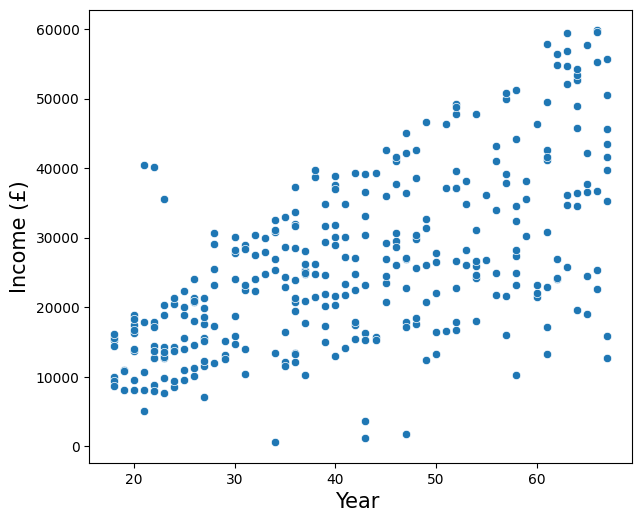

In [40]:
#Answer
plt.subplots(figsize=(7,6), dpi=100)
ax = sns.scatterplot(x="age", y="income", data=df, marker='o')
ax.set_xlabel('Year ',fontsize=15) # set x label
ax.set_ylabel('Income (£)',fontsize=15,rotation=90) # set y label

**TA22) Train a linear regression model to determine the "best line of fit" for this data using only the Year as the input variable**

* Hint: You might want to use the following library
  
  from sklearn import linear_model
  
 * Hint: You might want to check https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [41]:
#Answer
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(df["age"].to_numpy().reshape(-1,1), df["income"])

LinearRegression()

**TA23) Extract and report the coefficients (regression coefficient and intercept) of the trained linear regression model**

 * Hint: You might want to check https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [42]:
#Answer
print(reg.coef_)
print(reg.intercept_)

[539.11507264]
3631.49023086526


In [43]:
#Checking the closed-form formulae
#beta  = pearsonr * stdY / stdX
#alpha = meanY - beta * meanX
beta  = stats.pearsonr(df["age"], df["income"])[0] * np.std(df["income"],ddof=1)/np.std(df["age"],ddof=1)
alpha = np.mean(df["income"]) - beta * np.mean(df["age"])
print(alpha, beta)

3631.4902308652527 539.1150726420368


In [44]:
print(reg.coef_ * np.std(df["age"], ddof=1) / np.std(df["income"], ddof=1))
print(stats.pearsonr(df["age"], df["income"])[0])

[0.6237592]
0.6237592016595748


**TA24) Using your age, make a prediction about your income in 10 years time (i.e., your age in 2030). Also, report the complete linear regression model**


In [45]:
#Answer
print(reg.predict([[33]]))

[21422.28762805]


**TA25) Plot the linear regression model alongside the scatter plot from TA21**

* Hint: invoke the plotting functions (one for the scatter plot, one for the linear regression model) one after the other

* Hint: To generate the linear regression model, you can use (i) high school maths or (ii) the predict() method of the LinearRegression library

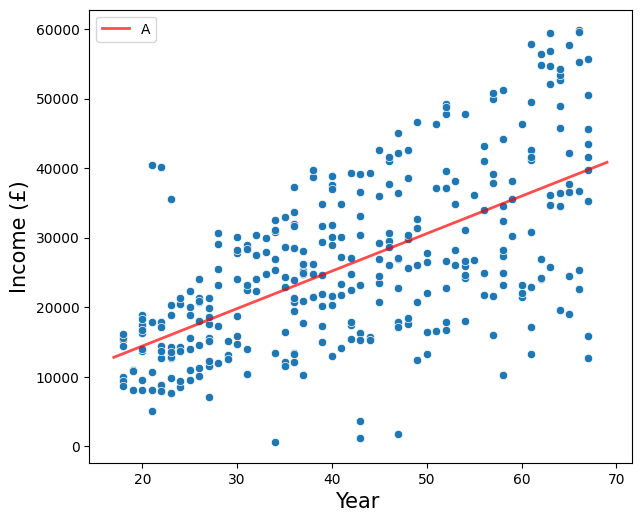

In [46]:
#Answer
plt.subplots(figsize=(7,6), dpi=100)
ax = sns.scatterplot(x="age", y="income", data=df, marker='o')
ax.set_xlabel('Year ',fontsize=15) # set x label
ax.set_ylabel('Income (£)',fontsize=15,rotation=90) # set y label

min = 17
max = 70
model = reg.predict(np.arange(min,max).reshape(-1, 1))
ax = sns.lineplot(y=model, x=np.arange(min,max), linestyle='-', color="r", label="A", alpha=0.7, lw=2)


## Should you finish earlier/want to practice at home, you could

* Go back to the previous practicals and run some statistical tests
    * Do some statistical analysis on the Titanic (e.g., is there a relationship between the people survived and gender?)
    * Do a linear regression on the Android Store (e.g., what might be the rating that a game of a specific nature might received)